<a href="https://colab.research.google.com/github/nataliatasso/WMC_notebooks/blob/main/%5BNOTEBOOK_11%5D_Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício Prático - Data Visualization

## Desafio Prático 1: Visualizando Dados Diferentes

Descrição: Neste desafio, suas alunas irão visualizar dados de diferentes formas utilizando Matplotlib, Seaborn e Plotly. Elas deverão criar gráficos que mostrem a distribuição dos dados, correlações entre variáveis e tendências.

In [ ]:
# Bibliotecas base
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

1. Carregar os dados de um arquivo CSV fornecido (saude.csv).

In [ ]:
df_saude = pd.read_csv('saude.csv', index_col=0)
df_saude.head()

,age,height,weight,gender
id,,,,
1,23,170,70,M
2,34,160,65,F
3,45,175,80,M
4,25,165,55,F
5,36,180,90,M


In [ ]:
df_saude.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     10 non-null     int64 
 1   height  10 non-null     int64 
 2   weight  10 non-null     int64 
 3   gender  10 non-null     object
dtypes: int64(3), object(1)
memory usage: 400.0+ bytes


2. Criar um histograma da variável 'age' usando Matplotlib.

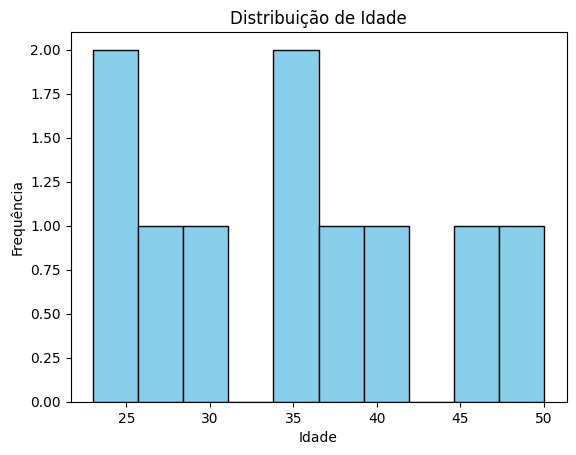

In [ ]:
# Criando o histograma
plt.hist(df_saude['age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição de Idade')
plt.show()

3. Criar um gráfico de dispersão mostrando a relação entre 'height' e 'weight' usando Seaborn.

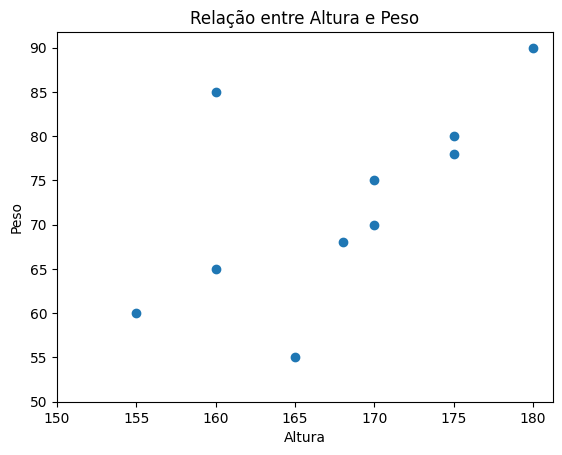

In [ ]:
# Criando o gráfico de dispersão
plt.scatter(df_saude['height'], df_saude['weight'])
plt.xlim(150)
plt.ylim(50)
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title('Relação entre Altura e Peso')
plt.show()

4. Criar um gráfico interativo de barras mostrando a contagem de indivíduos por
'gender' usando Plotly.

In [ ]:
# Contagem de indivíduos por gênero
gender_counts = df_saude['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

# Criando o gráfico de barras
fig = px.bar(gender_counts, x='gender', y='count', color='gender',
             barmode='overlay', title='Contagem de Indivíduos por Gênero')

# Ajustar os rótulos dos eixos
fig.update_layout(xaxis_title='Gênero', yaxis_title='Contagem')
fig.show()

## Desafio Prático 2: Séries Temporais

Descrição: Neste desafio, suas alunas irão analisar uma série temporal de dados de vendas. Elas deverão criar gráficos que mostrem as vendas ao longo do tempo, identificar tendências e sazonalidades.

1. Carregar os dados de um arquivo CSV fornecido (vendas.csv).

In [ ]:
df_vendas = pd.read_csv('vendas.csv')
df_vendas.head()

,date,sales
0,2023-01-01,100
1,2023-01-02,150
2,2023-01-03,200
3,2023-01-04,130
4,2023-01-05,180


In [ ]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    31 non-null     object
 1   sales   31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [ ]:
# Converter a coluna 'date' para datetime
df_vendas['date'] = pd.to_datetime(df_vendas['date'])

2. Criar um gráfico de linhas das vendas ao longo do tempo usando Matplotlib.


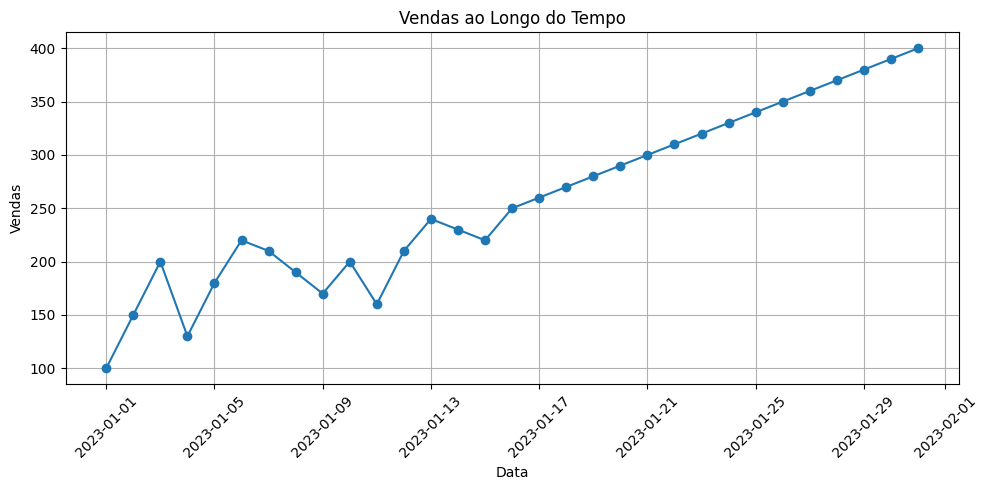

In [ ]:
# Criando o gráfico de linhas
plt.figure(figsize=(10, 5))
plt.plot(df_vendas['date'], df_vendas['sales'], marker='o')
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.grid(True)
plt.xticks(rotation=45)  # Rotacionar as datas para melhor visualização
plt.tight_layout()  # Ajustar o layout
plt.show()

3. Criar um gráfico de decomposição sazonal usando Seaborn.

In [ ]:
# Fazendo uma cópia do DataFrame para não perder os dados originais
df_vendas_index = df_vendas.copy()

# Definindo 'date' como índice para decomposição sazonal
df_vendas_index.set_index('date', inplace=True)

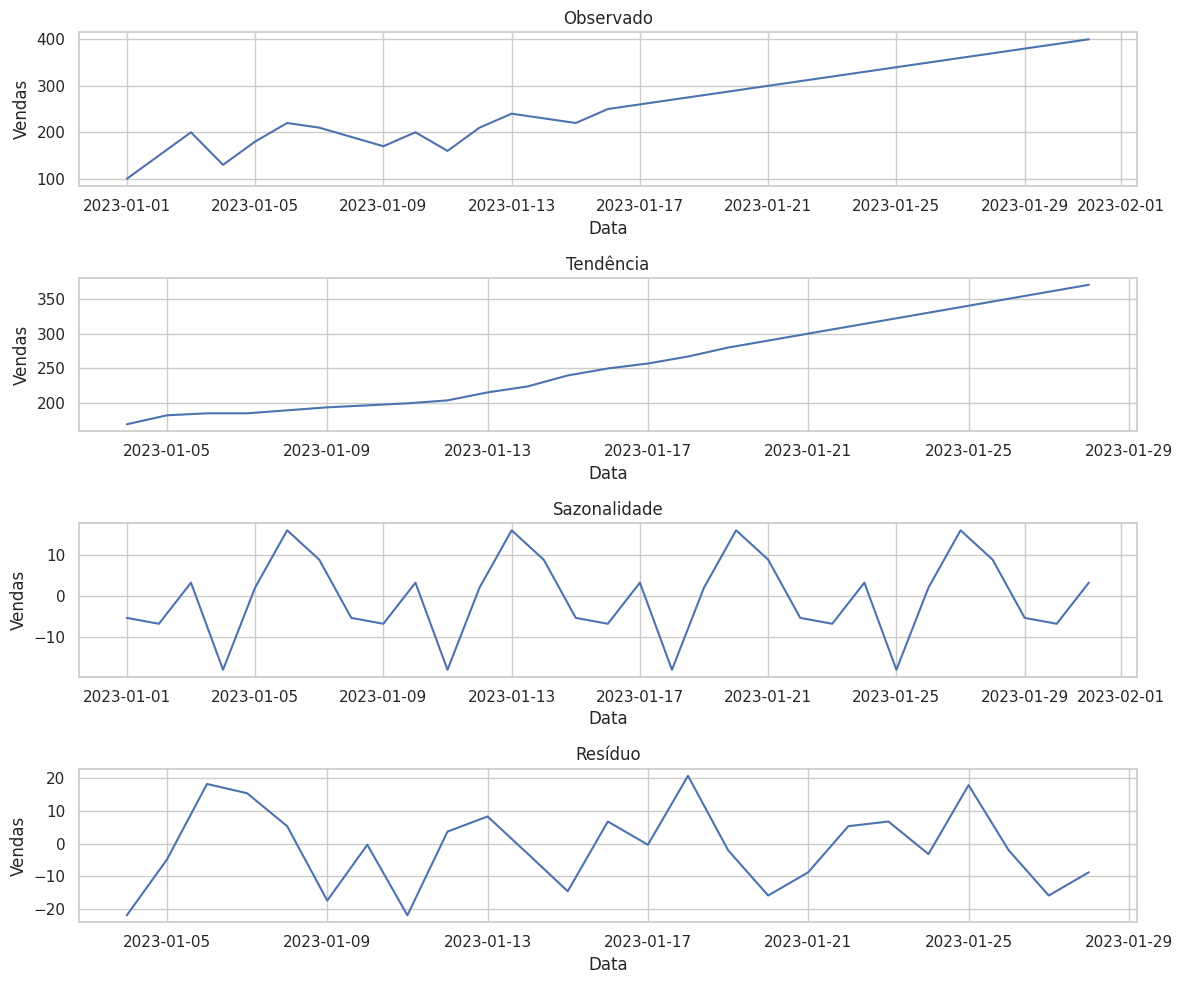

In [ ]:
# Decompor a série temporal
decomposition = seasonal_decompose(df_vendas_index['sales'], model='additive')

# Configurar estilo do Seaborn
sns.set(style='whitegrid')

# Plotar os componentes usando Seaborn
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

# Observado
sns.lineplot(x=decomposition.observed.index, y=decomposition.observed, ax=ax1)
ax1.set_title('Observado')
ax1.set_ylabel('Vendas')
ax1.set_xlabel('Data')

# Tendência
sns.lineplot(x=decomposition.trend.index, y=decomposition.trend, ax=ax2)
ax2.set_title('Tendência')
ax2.set_ylabel('Vendas')
ax2.set_xlabel('Data')

# Sazonalidade
sns.lineplot(x=decomposition.seasonal.index, y=decomposition.seasonal, ax=ax3)
ax3.set_title('Sazonalidade')
ax3.set_ylabel('Vendas')
ax3.set_xlabel('Data')

# Resíduo
sns.lineplot(x=decomposition.resid.index, y=decomposition.resid, ax=ax4)
ax4.set_title('Resíduo')
ax4.set_ylabel('Vendas')
ax4.set_xlabel('Data')

plt.tight_layout()
plt.show()

4. Criar um gráfico interativo que permita a exploração dos dados de vendas ao longo do tempo usando Plotly.

In [ ]:
# Criando o gráfico interativo
fig = px.line(df_vendas, x='date', y='sales', title='Vendas ao Longo do Tempo',
              labels={'date': 'Data', 'sales': 'Vendas'},
              markers=True)

fig.show()